In [1]:
import numpy as np
import pandas as pd
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

#### 아래 가이드에 따라서 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)
# 
#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.
#### 
거래 건수
- id : 1 ~ 10000번 일련번호

고객별 속성 데이터
- cusno : 고객 번호 1, 1000 정수 난수 생성
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_20
- amount_21 : price_21 * quantity_21

고객별 데이터 집계시 계산
- sales : 20년 대비 21년구매금액이 증가면 1, 감소면 0
# 

#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요
# 
#### Q3. df를 탐색적 분석을 통하여 인사이트를 도출하세요.


In [100]:
frame = np.zeros((10000, 12))
columns = ['id', 'cusno', 'gender', 'age', 'region', 'time', 'day', 'date', 'price', 'quantity', 'amount', 'product']
index = np.arange(1, 10001)
df = pd.DataFrame(frame, index, columns)

cusno = np.arange(1, 1001)
gender = np.random.randint(2, size = 1000)
age = np.random.randint(1, 81, size = 1000)
region = np.random.randint(1, 11, size = 1000)
cus_data = list(zip(cusno, gender, age, region))
cus_data = [random.choice(cus_data) for i in range(10000)]
cus_data = np.array(cus_data)

date = pd.date_range('2020-01-01', '2021-12-31', freq = 'D')
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
def day__(x):
    a = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
    return a[x]

bin_names = ['저가제품', '중가제품', '고가제품']
count, bin_dividers = np.histogram(np.arange(1, 50001), bins = 3)
# print(bin_dividers.astype(int))
df.id = np.arange(1, 10001)

df.cusno = cus_data[:, 0]
df.gender = cus_data[:, 1]
df.age = cus_data[:, 2]
df.region = cus_data[:, 3]
df.date = np.random.choice(date, size = 10000)
df.day = df['date'].dt.dayofweek.apply(day__)
df.price = np.random.uniform(1, 50000, size = 10000).round(3)
df['product'] = pd.cut(x = df.price,
                        bins = bin_dividers,
                        labels = bin_names,
                        include_lowest = True)
df.quantity = np.random.randint(1, 101, size = 10000)
df.time = np.random.randint(1, 25, size = 10000)
df.amount = df.price * df.quantity

df

,id,cusno,gender,age,region,time,day,date,price,quantity,amount,product
1,1,127,0,53,3,17,wed,2020-12-16,18159.700,66,1198540.200,중가제품
2,2,383,0,20,4,1,mon,2021-08-02,12921.689,2,25843.378,저가제품
3,3,343,1,53,3,24,fri,2021-06-04,19346.644,32,619092.608,중가제품
4,4,788,1,10,8,15,sat,2020-08-22,22407.184,23,515365.232,중가제품
5,5,257,0,79,7,9,wed,2020-01-08,22048.076,49,1080355.724,중가제품
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,1000,1,36,7,12,mon,2021-04-26,39850.729,12,478208.748,고가제품
9997,9997,774,0,19,9,17,fri,2020-10-23,48139.787,33,1588612.971,고가제품
9998,9998,244,0,33,10,22,tue,2020-07-14,3449.045,1,3449.045,저가제품
9999,9999,60,0,13,2,12,tue,2020-09-08,26271.011,53,1392363.583,중가제품


In [3]:
df['product'].replace(['고가제품', '중가제품', '저가제품'], [10, 20, 30], inplace = True)
df1 = df.set_index('id')
dfc = df1.copy()
dfc

,cusno,gender,age,region,time,day,date,price,quantity,amount,product
id,,,,,,,,,,,
1,954,0,61,6,8,sun,2020-04-26,15935.958,62,988029.396,30
2,657,0,4,2,3,sat,2020-05-09,19243.835,40,769753.400,20
3,773,0,38,1,3,sun,2021-08-01,5634.142,68,383121.656,30
4,825,0,4,7,15,fri,2020-12-25,30512.453,76,2318946.428,20
5,190,1,23,8,5,tue,2021-03-02,18570.915,86,1597098.690,20
...,...,...,...,...,...,...,...,...,...,...,...
9996,487,0,71,3,13,wed,2020-09-30,16307.283,81,1320889.923,30
9997,127,0,38,8,8,sun,2021-08-08,2485.269,26,64616.994,30
9998,424,0,32,7,15,wed,2021-07-07,34760.610,15,521409.150,10


In [4]:
dfc = df1.copy()
print(dfc[['gender']].value_counts(), '\n')
print(dfc[['region']].value_counts(), '\n')
print(dfc[['day']].value_counts(), '\n')


print(dfc[['gender', 'product']].value_counts(), '\n')
print(dfc[['cusno', 'product']].value_counts(), '\n')
dfc[['age']].describe(percentiles = np.arange(1, 10) * 0.1)

gender
0         5117
1         4883
dtype: int64 

region
5         1111
1         1067
2         1066
10        1028
6         1022
3          976
4          968
8          955
7          946
9          861
dtype: int64 

day
sat    1468
mon    1449
tue    1446
wed    1440
fri    1420
sun    1399
thu    1378
dtype: int64 

gender  product
0       10         1753
        30         1686
        20         1678
1       10         1658
        30         1639
        20         1586
dtype: int64 

cusno  product
291    20         11
40     20         10
234    20         10
981    20         10
602    20         10
                  ..
177    30          1
387    30          1
       10          1
180    10          1
551    20          1
Length: 2887, dtype: int64 



,age
count,10000.000000
mean,39.266200
std,22.607261
min,1.000000
10%,8.000000
20%,16.000000
30%,23.000000
40%,31.000000
50%,38.000000
60%,46.000000


In [5]:
dfc1 = pd.pivot_table(df,
                      index = ['gender', 'age'],
                      values = ['quantity'],
                      aggfunc = ['mean'])
dfc1

mean
             quantity
gender age           
0      1    48.359223
       2    51.535714
       3    51.965517
       4    56.531915
       5    50.606383
...               ...
1      76   48.586207
       77   51.872727
       78   53.608696
       79   54.540541
       80   51.862069

[160 rows x 1 columns]

In [6]:
dfc = df1.copy()
dfc2020 = dfc[dfc['date'].dt.year == 2020]
dfc2021 = dfc[dfc['date'].dt.year == 2021]

display(dfc2020)
display(dfc2021)

,cusno,gender,age,region,time,day,date,price,quantity,amount,product
id,,,,,,,,,,,
1,954,0,61,6,8,sun,2020-04-26,15935.958,62,988029.396,30
2,657,0,4,2,3,sat,2020-05-09,19243.835,40,769753.400,20
4,825,0,4,7,15,fri,2020-12-25,30512.453,76,2318946.428,20
7,78,1,35,4,13,tue,2020-04-21,38107.507,48,1829160.336,10
10,845,1,5,4,22,tue,2020-01-14,620.776,43,26693.368,30
...,...,...,...,...,...,...,...,...,...,...,...
9992,780,0,43,5,15,wed,2020-09-23,12548.667,38,476849.346,30
9993,653,1,24,3,12,mon,2020-10-05,34415.054,34,1170111.836,10
9994,284,1,22,2,4,mon,2020-06-29,255.134,85,21686.390,30


,cusno,gender,age,region,time,day,date,price,quantity,amount,product
id,,,,,,,,,,,
3,773,0,38,1,3,sun,2021-08-01,5634.142,68,383121.656,30
5,190,1,23,8,5,tue,2021-03-02,18570.915,86,1597098.690,20
6,651,0,63,3,13,fri,2021-10-29,48955.289,89,4357020.721,10
8,551,1,17,5,7,tue,2021-02-23,5132.469,42,215563.698,30
9,531,1,35,3,6,tue,2021-07-27,34508.796,18,621158.328,10
...,...,...,...,...,...,...,...,...,...,...,...
9989,367,0,38,2,2,sun,2021-12-12,27344.070,4,109376.280,20
9997,127,0,38,8,8,sun,2021-08-08,2485.269,26,64616.994,30
9998,424,0,32,7,15,wed,2021-07-07,34760.610,15,521409.150,10


#### - 연말, 연초 매출 상승
#### - 평균연령 상승
#### - 1, 2, 3 지역은 가처분 소득이 높은 지역
#### - 8, 9, 10 지역은 가처분 소득이 낮은 지역
#### - 코로나 반영 (9시 이후 매출 감소, 기펜재 수요 증가, 2020년 3월부터 매출 감소)
#### - 주말 수요 증가

In [88]:
df  # 원본

,id,cusno,gender,age,region,time,day,date,price,quantity,amount,product
1,1,954,0,61,6,8,sun,2020-04-26,15935.958,62,988029.396,30
2,2,657,0,4,2,3,sat,2020-05-09,19243.835,40,769753.400,20
3,3,773,0,38,1,3,sun,2021-08-01,5634.142,68,383121.656,30
4,4,825,0,4,7,15,fri,2020-12-25,30512.453,76,2318946.428,20
5,5,190,1,23,8,5,tue,2021-03-02,18570.915,86,1597098.690,20
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,487,0,71,3,13,wed,2020-09-30,16307.283,81,1320889.923,30
9997,9997,127,0,38,8,8,sun,2021-08-08,2485.269,26,64616.994,30
9998,9998,424,0,32,7,15,wed,2021-07-07,34760.610,15,521409.150,10
9999,9999,446,1,75,5,12,tue,2021-01-19,18179.185,11,199971.035,20


In [89]:
df1 = df.set_index('id')
df1['product'].replace(['고가제품', '중가제품', '저가제품'], [10, 20, 30], inplace = True)

df1  # 수정본

,cusno,gender,age,region,time,day,date,price,quantity,amount,product
id,,,,,,,,,,,
1,954,0,61,6,8,sun,2020-04-26,15935.958,62,988029.396,30
2,657,0,4,2,3,sat,2020-05-09,19243.835,40,769753.400,20
3,773,0,38,1,3,sun,2021-08-01,5634.142,68,383121.656,30
4,825,0,4,7,15,fri,2020-12-25,30512.453,76,2318946.428,20
5,190,1,23,8,5,tue,2021-03-02,18570.915,86,1597098.690,20
...,...,...,...,...,...,...,...,...,...,...,...
9996,487,0,71,3,13,wed,2020-09-30,16307.283,81,1320889.923,30
9997,127,0,38,8,8,sun,2021-08-08,2485.269,26,64616.994,30
9998,424,0,32,7,15,wed,2021-07-07,34760.610,15,521409.150,10


In [90]:
# 연말, 연초 매출 상승 반영

df3 = df1.copy()

df2 = df1[(df1['date'].dt.month == 12) | (df1['date'].dt.month == 1)]
df3['price'] = df2['price'] * 1.5
df3['quantity'] = (df2['quantity'] * 1.2).astype(int)
df3[['price', 'quantity']] = np.where(pd.notnull(df3[['price', 'quantity']]) == True, df3[['price', 'quantity']], df1[['price', 'quantity']])
df3

,cusno,gender,age,region,time,day,date,price,quantity,amount,product
id,,,,,,,,,,,
1,954,0,61,6,8,sun,2020-04-26,15935.9580,62.0,988029.396,30
2,657,0,4,2,3,sat,2020-05-09,19243.8350,40.0,769753.400,20
3,773,0,38,1,3,sun,2021-08-01,5634.1420,68.0,383121.656,30
4,825,0,4,7,15,fri,2020-12-25,45768.6795,91.0,2318946.428,20
5,190,1,23,8,5,tue,2021-03-02,18570.9150,86.0,1597098.690,20
...,...,...,...,...,...,...,...,...,...,...,...
9996,487,0,71,3,13,wed,2020-09-30,16307.2830,81.0,1320889.923,30
9997,127,0,38,8,8,sun,2021-08-08,2485.2690,26.0,64616.994,30
9998,424,0,32,7,15,wed,2021-07-07,34760.6100,15.0,521409.150,10


In [91]:
# 평균연령 반영

df1 = df3.copy()

def age(x):
    if x <= 10:
        return x * 1.1
    if x <= 17:
        return x * 1.2
    elif x <= 34:
        return x * 1.2
    elif x <= 56:
        return x * 1.1
    elif x <= 75:
        return x * 0.9
    elif x <= 80:
        return x * 0.9
    
df1['age'] = df1['age'].apply(age)
df1['age'].describe(percentiles = np.arange(1, 10) * 0.1)
df1

,cusno,gender,age,region,time,day,date,price,quantity,amount,product
id,,,,,,,,,,,
1,954,0,54.9,6,8,sun,2020-04-26,15935.9580,62.0,988029.396,30
2,657,0,4.4,2,3,sat,2020-05-09,19243.8350,40.0,769753.400,20
3,773,0,41.8,1,3,sun,2021-08-01,5634.1420,68.0,383121.656,30
4,825,0,4.4,7,15,fri,2020-12-25,45768.6795,91.0,2318946.428,20
5,190,1,27.6,8,5,tue,2021-03-02,18570.9150,86.0,1597098.690,20
...,...,...,...,...,...,...,...,...,...,...,...
9996,487,0,63.9,3,13,wed,2020-09-30,16307.2830,81.0,1320889.923,30
9997,127,0,41.8,8,8,sun,2021-08-08,2485.2690,26.0,64616.994,30
9998,424,0,38.4,7,15,wed,2021-07-07,34760.6100,15.0,521409.150,10


In [99]:
# 1, 2, 3 지역은 가처분 소득이 높은 지역
# 8, 9, 10 지역은 가처분 소득이 낮은 지역

df1

df2 = df1[df1['region'] <= 3]
df2['price'] = df2['price'] * 1.3
df2['quantity'] = df2['quantity'] * 1.1
df2 # 1, 2, 3 지역 적용

df3 = df1[df1['region'] >= 8]
df3['price'] = df3['price'] * 0.6
df3['quantity'] = df3['quantity'] * 0.8
df3 # 8, 9, 10 지역 적용

df2_3 = pd.concat([df2, df3], axis = 0) # 1, 2, 3, 8, 9, 10 지역 적용
df2_3_r = df1[(df1['region'] > 3) & (df1['region'] < 8)] # 4, 5, 6, 7 지역
df4 = pd.concat([df2_3, df2_3_r], axis = 0).sort_index(ascending = True)
df4



,cusno,gender,age,region,time,day,date,price,quantity,amount,product
id,,,,,,,,,,,
1,954,0,54.9,6,8,sun,2020-04-26,1.593596e+04,62.0,988029.396,30
2,657,0,4.4,2,3,sat,2020-05-09,3.127123e+06,44.0,769753.400,20
3,773,0,41.8,1,3,sun,2021-08-01,9.155481e+05,74.8,383121.656,30
4,825,0,4.4,7,15,fri,2020-12-25,4.576868e+04,91.0,2318946.428,20
5,190,1,27.6,8,5,tue,2021-03-02,1.114255e+04,68.8,1597098.690,20
...,...,...,...,...,...,...,...,...,...,...,...
9996,487,0,63.9,3,13,wed,2020-09-30,2.649933e+06,89.1,1320889.923,30
9997,127,0,41.8,8,8,sun,2021-08-08,1.491161e+03,20.8,64616.994,30
9998,424,0,38.4,7,15,wed,2021-07-07,3.476061e+04,15.0,521409.150,10


In [ ]:
# df1.loc(조건, 출력하고 싶은 열)

# df1.loc[(df1['region'] <= 3), 'price'] = df1.loc[(df1['region'] <= 3), 'price'] * 5

# df1

In [12]:
# 주말 수요 증가

df1 = df4.copy()
df1.day = df['date'].dt.dayofweek

df2 = df1[df1['day'] >= 4]
df2['quantity'] = df2['quantity'] * 1.2
df2['price'] = df2['price'] * 1.2
df2 # 주말 수요 증가 반영

df2_r = df1[df1['day'] < 4]
df3 = pd.concat([df2, df2_r], axis = 0).sort_index(ascending = True)
df3

,cusno,gender,age,region,time,day,date,price,quantity,amount,product
id,,,,,,,,,,,
1,954,0,54.9,6,8,6,2020-04-26,19123.14960,74.40,988029.396,30
2,657,0,4.4,2,3,5,2020-05-09,30020.38260,52.80,769753.400,20
3,773,0,41.8,1,3,6,2021-08-01,8789.26152,89.76,383121.656,30
4,825,0,4.4,7,15,4,2020-12-25,54922.41540,109.20,2318946.428,20
5,190,1,27.6,8,5,1,2021-03-02,11142.54900,68.80,1597098.690,20
...,...,...,...,...,...,...,...,...,...,...,...
9996,487,0,63.9,3,13,2,2020-09-30,21199.46790,89.10,1320889.923,30
9997,127,0,41.8,8,8,6,2021-08-08,1789.39368,24.96,64616.994,30
9998,424,0,38.4,7,15,2,2021-07-07,34760.61000,15.00,521409.150,10


In [13]:
# 코로나 반영 (2020년 3월부터 매출 감소, 9시 이후 매출 감소, 사치재 수요 증가)

df1 = df3.copy()

df2 = df1[(df1['product'] == 10) & (df1['date'] >= '2020-03-01')]
df2['quantity'] = df2['quantity'].apply(lambda x: x * 1.5)
df2 # 사치재 반영

df3 = df1[(df1['product'] != 10) & (df1['date'] >= '2020-03-01')]
df3['quantity'] = df3['quantity'].apply(lambda x: x * 0.7)
df3 # 3월 이후 매출감소

df4 = df3[(df3['time'] >= 21) | (df['time'] <= 5)]
df4['quantity'] = df4['quantity'].apply(lambda x: x * 0.5)
df4 # 9시 이후 매출 감소

df4_r = df3[(df3['time'] > 5) & (df3['time'] < 21)]
df2_r = df1[df1['date'] < '2020-03-01']

df3_9 = pd.concat([df4, df4_r], axis = 0) # 3월 이후 9시 매출 감소
df3_9_2 = pd.concat([df3_9, df2], axis = 0) # 3월 이후 9시 매출 감소, 사치재 증가 반영
df5 = pd.concat([df3_9_2, df2_r], axis = 0).sort_index(ascending = True)

df5

,cusno,gender,age,region,time,day,date,price,quantity,amount,product
id,,,,,,,,,,,
1,954,0,54.9,6,8,6,2020-04-26,19123.14960,52.080,988029.396,30
2,657,0,4.4,2,3,5,2020-05-09,30020.38260,18.480,769753.400,20
3,773,0,41.8,1,3,6,2021-08-01,8789.26152,31.416,383121.656,30
4,825,0,4.4,7,15,4,2020-12-25,54922.41540,76.440,2318946.428,20
5,190,1,27.6,8,5,1,2021-03-02,11142.54900,24.080,1597098.690,20
...,...,...,...,...,...,...,...,...,...,...,...
9996,487,0,63.9,3,13,2,2020-09-30,21199.46790,62.370,1320889.923,30
9997,127,0,41.8,8,8,6,2021-08-08,1789.39368,17.472,64616.994,30
9998,424,0,38.4,7,15,2,2021-07-07,34760.61000,22.500,521409.150,10


### 데이터 분석

<AxesSubplot:>

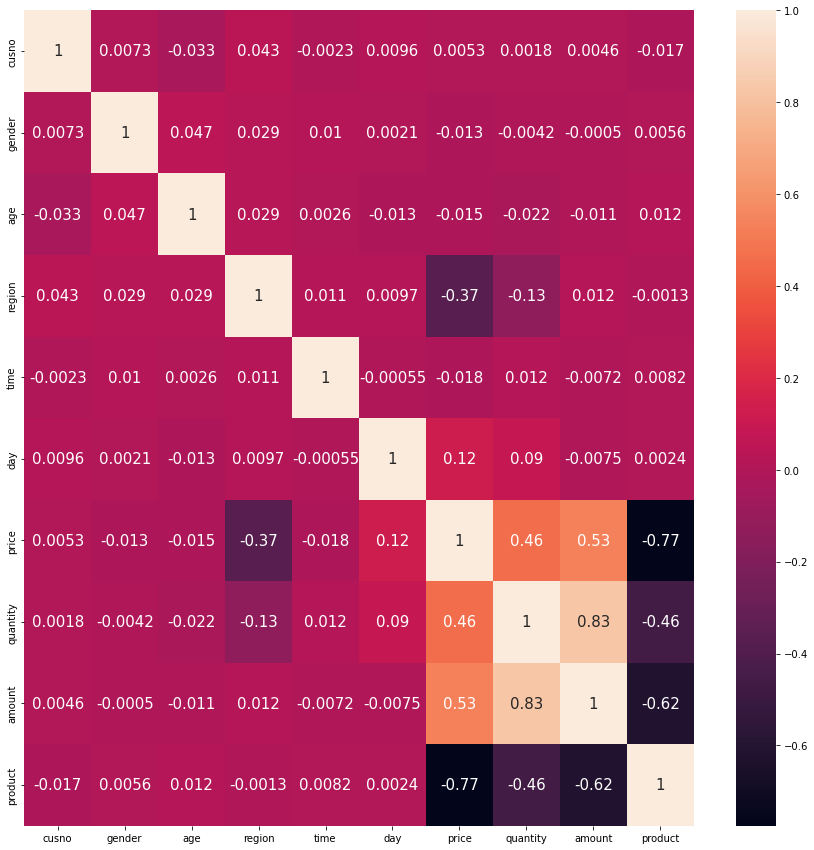

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df5.copy()

plt.figure(figsize = (15, 15))
sns.heatmap(df5.corr(), annot_kws = {'size' : 15}, annot = True) 

<AxesSubplot:xlabel='age', ylabel='Density'>

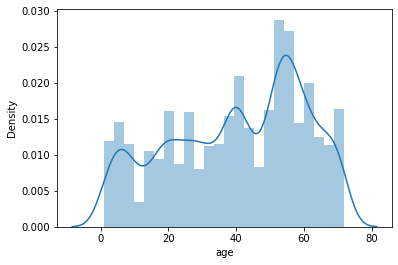

In [15]:
sns.distplot(df5['age'])

In [16]:
df1.day = df['date'].dt.dayofweek.apply(day__)
df1.quantity = df1.quantity.astype(int)
df1.price = df1.price.round(2)
df1.age = df1.age.astype(int)
df1['product'].replace([10, 20, 30], ['고가제품', '중가제품', '저가제품'], inplace = True)
df1['gender'].replace([0, 1], ['male', 'female'], inplace = True)
df1.amount = df1.price * df1.quantity

display(df) # 원본
display(df1) # 데이터 반영본

,id,cusno,gender,age,region,time,day,date,price,quantity,amount,product
1,1,954,0,61,6,8,sun,2020-04-26,15935.958,62,988029.396,30
2,2,657,0,4,2,3,sat,2020-05-09,19243.835,40,769753.400,20
3,3,773,0,38,1,3,sun,2021-08-01,5634.142,68,383121.656,30
4,4,825,0,4,7,15,fri,2020-12-25,30512.453,76,2318946.428,20
5,5,190,1,23,8,5,tue,2021-03-02,18570.915,86,1597098.690,20
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,487,0,71,3,13,wed,2020-09-30,16307.283,81,1320889.923,30
9997,9997,127,0,38,8,8,sun,2021-08-08,2485.269,26,64616.994,30
9998,9998,424,0,32,7,15,wed,2021-07-07,34760.610,15,521409.150,10
9999,9999,446,1,75,5,12,tue,2021-01-19,18179.185,11,199971.035,20


,cusno,gender,age,region,time,day,date,price,quantity,amount,product
id,,,,,,,,,,,
1,954,male,54,6,8,sun,2020-04-26,19123.15,52,994403.80,저가제품
2,657,male,4,2,3,sat,2020-05-09,30020.38,18,540366.84,중가제품
3,773,male,41,1,3,sun,2021-08-01,8789.26,31,272467.06,저가제품
4,825,male,4,7,15,fri,2020-12-25,54922.42,76,4174103.92,중가제품
5,190,female,27,8,5,tue,2021-03-02,11142.55,24,267421.20,중가제품
...,...,...,...,...,...,...,...,...,...,...,...
9996,487,male,63,3,13,wed,2020-09-30,21199.47,62,1314367.14,저가제품
9997,127,male,41,8,8,sun,2021-08-08,1789.39,17,30419.63,저가제품
9998,424,male,38,7,15,wed,2021-07-07,34760.61,22,764733.42,고가제품


In [35]:
# 지역별 구매력

dfc = df1.copy()

dfc1 = pd.pivot_table(dfc,
                      index = ['region'],
                      values = ['quantity', 'price'],
                      aggfunc = ['mean'])
dfc1

mean           
               price   quantity
region                         
1       39046.536710  55.523899
2       38237.519156  56.088180
3       38324.430799  56.244877
4       29275.368058  50.973140
5       29684.489487  50.180018
6       29186.116204  49.362035
7       28724.835433  49.584567
8       17541.829246  42.920419
9       17719.236365  38.859466
10      18350.009027  41.398833

In [33]:
# 요일별 판매량

dfc = df1.copy()

dfc1 = pd.pivot_table(dfc,
                      index = ['day'],
                      values = ['quantity', 'price'],
                      aggfunc = ['mean'])
dfc1

mean           
            price   quantity
day                         
fri  32311.723887  56.800704
mon  25910.099731  44.602484
sat  31166.297289  51.575613
sun  32223.827741  54.291637
thu  27203.923483  45.851234
tue  26010.194710  45.265560
wed  27544.133667  47.077083

In [101]:
dfc = df1.copy()

dfc1 = dfc[(dfc['time'] >= 21) | (dfc['time'] <= 5)]
dfc1

,cusno,gender,age,region,time,day,date,price,quantity,amount,product
id,,,,,,,,,,,
2,657,0,4.4,2,3,sat,2020-05-09,2405479.375,40.0,769753.400,20
3,773,0,41.8,1,3,sun,2021-08-01,704267.750,68.0,383121.656,30
5,190,1,27.6,8,5,tue,2021-03-02,18570.915,86.0,1597098.690,20
10,845,1,5.5,4,22,tue,2020-01-14,931.164,51.0,26693.368,30
13,301,1,62.1,6,2,mon,2021-04-26,47487.565,36.0,1709552.340,10
...,...,...,...,...,...,...,...,...,...,...,...
9980,613,0,41.8,6,4,fri,2021-07-30,27831.184,29.0,807104.336,20
9989,367,0,41.8,2,2,sun,2021-12-12,5127013.125,4.0,109376.280,20
9991,888,1,9.9,6,22,sun,2020-02-16,37712.594,36.0,1357653.384,10


<AxesSubplot:>

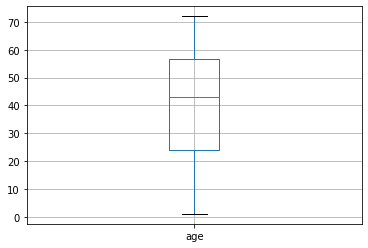

In [107]:
dfc1.boxplot(column = ['age'])